# Negaunee Iron Formation, Goodrich Quartzite, and associated Ore body Paleomagnetic Analyses

 This notebook analyzes and visualizes the paleomagnetic from the Neguanee Iron Formation, Goodrich Quartzite, and hematite ore body associated with manuscript under review : 
> Fuentes, A.J., Courtney-Davies, L., Flowers, R.M., Zhang, Y., Swanson-Hysell, N.L., Hematite crystallization within Paleoproterozoic iron formation during Neoproterozoic tectonic quiescence, * in review*

In [1]:
import pandas as pd
pd.set_option('display.max_columns', None)
import numpy as np 
import pmagpy.pmag as pmag
import pmagpy.ipmag as ipmag
import pmagpy.contribution_builder as cb
import matplotlib.pyplot as plt
import mplstereonet

plt.rcParams['pdf.fonttype'] = 42

%matplotlib inline

In [2]:
hmt_color='#de2d26'
mgt_color='#43a2ca'

jk_top_clr=hmt_color
jk_side_clr='#756bb1'
jk_west_clr='#bdbdbd'
nf_color='#feb24c'

# Field Measurements 

Here we import the bedding measurements and filter to grab just the bedding measurements and fold axes orientations for the Negaunee Iron Formation  

In [15]:

nsh_planes = pd.read_csv('../data/bedding/NSH_plane.csv')
nsh_lines=pd.read_csv('../data/bedding/NSH_line.csv')
nsh_planes=nsh_planes[nsh_planes[' unitId'] == ' Naguanee IF ']
nsh_lines=nsh_lines[nsh_lines[' unitId'] == ' Naguanee IF ']



ajf_planes=pd.read_csv('../data/bedding/AJF_plane.csv')
ajf_planes=ajf_planes[ajf_planes[' unitId']== ' Negaunee ']
ajf_planes_v2=pd.read_csv('../data/bedding/plane.csv')
ajf_planes_v2=ajf_planes_v2[(ajf_planes_v2[' unitId']== ' Negaunee') & (ajf_planes_v2[' planeType']==' Bedding')]

ajf_lines=pd.read_csv('../data/bedding/AJF_line.csv')
ajf_lines=ajf_lines[ajf_lines[' unitId']==' Negaunee ']

IF_planes=pd.concat([nsh_planes,ajf_planes,ajf_planes_v2],axis=0)
jk_lines=pd.concat([nsh_lines,ajf_lines],axis=0) # trend and plunge of the fold axes at Jasper Knob





Filter the Negaunee bedding orientations (IF_planes ) into the New Richmond and Jasper Knob localities 

In [24]:
newrich_planes=IF_planes [IF_planes[' localityName']==' New Richmond Mine']
jk_planes=IF_planes[(IF_planes[' localityName']==' Jasper knob')| (IF_planes[' localityName']==' Locality 1')]



This next section of code calculates the poles to bedding for all of the Jasper Knob plane measurements and the fisher mean trend and plunge for the best fit to the syncline fold axis (mean axis). In the equal area net below we also fit a girdle to the poles to bedding and determine a fold axis as the pole to the girdle. The pole to the girdle is included within the 95 % confidence interval of measured fold axes

In [60]:
jk_planes['pole_trend'] = (jk_planes[' dipAzimuth']+180)%360
jk_planes['pole_plunge'] = 90-jk_planes[' dip']

jk_planes=jk_planes[(jk_planes[' strike']>250) | (jk_planes[' strike']<90)] # bad measurements
jk_lines=jk_lines[(jk_lines[' plungeAzimuth']<120) & (jk_lines[' plungeAzimuth']>0)]


In [61]:
trend=jk_lines[' plungeAzimuth']
plunge=jk_lines[' plunge']
mean_ax=ipmag.fisher_mean(trend.to_list(),plunge.tolist())

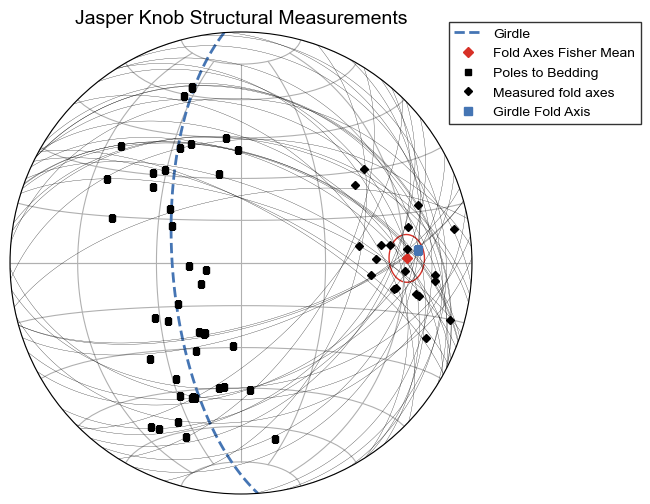

In [66]:
# plot the poles and planes for the bedding measurements 
fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot( projection='equal_area_stereonet')

strike, dip = jk_planes[' dipAzimuth']-90, jk_planes[' dip']
#trend,plunge=jk_lines[' plungeAzimuth'], jk_lines[' plunge']
trend,plunge=(jk_lines[' plungeAzimuth']-90%360), (jk_lines[' plunge']+90)
fit_strike, fit_dip = mplstereonet.fit_girdle(strike, dip)
ax.plane(fit_strike, fit_dip, color='#4575b4',linestyle='--', lw=2,label='Girdle')

ax.set_title('Jasper Knob Structural Measurements',font='arial',fontsize=14)

ax.plane(strike, dip, '-', color= 'black',linewidth=0.2)
ax.line(mean_ax['inc'],mean_ax['dec'],marker='D',markersize= 5,color='#d73027',label='Fold Axes Fisher Mean')
ax.pole(strike, dip, 's',color='black', markersize=4,label='Poles to Bedding')
ax.pole(trend,plunge,marker='D',markersize=4,color='black',label='Measured fold axes')
ax.cone(mean_ax['inc'],mean_ax['dec'],angle=mean_ax['alpha95'],facecolor="None", edgecolor="#d73027",label='\u03B1 95')
ax.pole(fit_strike, fit_dip, marker='s', color='#4575b4', markersize=6,label='Girdle Fold Axis')

ax.legend(prop='Arial',fontsize=14,fancybox=False,edgecolor='black',loc=(0.95,0.8))
ax.grid(True)
ax.set_azimuth_ticks([])




Next we will plot the bedding for the jaspillite at New Richmond mine. Note that the bedding at the New Richmond mine is overall far shallower than at Jasper Knob that does not allow for the implementation of a fold test 

In [25]:
newrich_planes['pole_trend'] = (newrich_planes[' dipAzimuth']+180)%360
newrich_planes['pole_plunge'] = 90-newrich_planes[' dip']


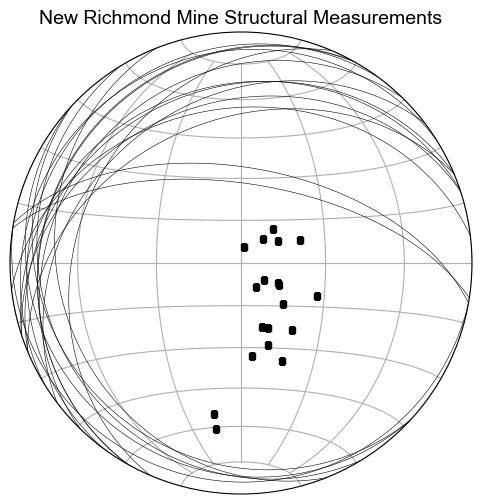

In [67]:
# plot the poles and planes for the bedding measurements 
fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot( projection='equal_area_stereonet')

strike, dip = newrich_planes[' dipAzimuth']-90, newrich_planes[' dip']
ax.set_title('New Richmond Mine Structural Measurements',font='arial',fontsize=14)
ax.plane(strike, dip, '-', color= 'black',linewidth=0.4)
ax.pole(strike, dip, 's',color='black', markersize=4,label='Poles to Bedding')
ax.grid(True)
ax.set_azimuth_ticks([])



## Grab Paleomagnetic data from the MagIC contribution for the study

 Here we are pulling the full paleomagnetic dataset and unpacking into the designated directory. Please change the file path in "dir_path" to your desired file directory so the magIC files can be unpacked and used in this notebook



In [29]:
	
# define the path to the folder 
dir_path = '../data/MagIC_Format/review'
# download the data from the MagIC database using my private contribution key 
result, magic_file = ipmag.download_magic_from_id('20184', directory=dir_path, share_key='97f14fd4-aa5e-4816-a13c-c3dff197bc05')
# unpack the MagIC file
ipmag.unpack_magic(magic_file, dir_path)
# get the contribution object
contribution = cb.Contribution(dir_path)
# get the specimen tables
all_specimens= contribution.tables['specimens'].df
all_samples= contribution.tables['samples'].df


Download successful. File saved to: ../data/MagIC_Format/review/magic_contribution_20184.txt
working on:  'contribution'
1  records written to file  /Users/anthonyfuentes/GitHub/Negaunee_Goodrich/data/MagIC_Format/review/contribution.txt
contribution  data put in  /Users/anthonyfuentes/GitHub/Negaunee_Goodrich/data/MagIC_Format/review/contribution.txt
working on:  'locations'
3  records written to file  /Users/anthonyfuentes/GitHub/Negaunee_Goodrich/data/MagIC_Format/review/locations.txt
locations  data put in  /Users/anthonyfuentes/GitHub/Negaunee_Goodrich/data/MagIC_Format/review/locations.txt
working on:  'sites'
12  records written to file  /Users/anthonyfuentes/GitHub/Negaunee_Goodrich/data/MagIC_Format/review/sites.txt
sites  data put in  /Users/anthonyfuentes/GitHub/Negaunee_Goodrich/data/MagIC_Format/review/sites.txt
working on:  'samples'
86  records written to file  /Users/anthonyfuentes/GitHub/Negaunee_Goodrich/data/MagIC_Format/review/samples.txt
samples  data put in  /User

The specimens table include the fitted thermal demangetization components for the hemtatite (hmt) and magnetite components (Mgt) in both geographic and tilt corrected coordinate systems. We split each component into tilt `['dir_tilt_correction']==100)]` and geographic components`['dir_tilt_correction']==0)]`.

The samples table includes the bedding measurements associated with each specimen. For the fold test, the dip and dip direction of the jaspillite laminae were used and each specimen corresponds to a consistent dip panel.



## Separate Goodrich from Negaunee

In this section we will split the all_specimens into Neguanee (IF) and Goodrich Quartzite (gq) groupings. We will then split the Negaunee up into Jasper Knob specimens(JK) and those from New Richmon (NF). We will also combine the IF specimens with their bedding orientations to facilitate a fold test further on in this notebook

In [30]:
IF_samples=all_samples[all_samples['sample'].str.match('jk.|NF.')]
gq_samples=all_samples[all_samples['sample'].str.match('GQ.')]

IF_specimen=all_specimens[all_specimens['sample'].str.match('jk.|NF.')]
gq_specimens=all_specimens[all_specimens['sample'].str.match('GQ.')]

In [31]:
IF_bedding=IF_samples[['sample','bed_dip_direction','bed_dip']]

IF_hmt_geo=IF_specimen[(IF_specimen['dir_comp']=='Hmt')&(IF_specimen['dir_tilt_correction']==0)]
IF_hmt_tilt=IF_specimen[(IF_specimen['dir_comp']=='Hmt')&(IF_specimen['dir_tilt_correction']==100)]

IF_mgt_geo=IF_specimen[(IF_specimen['dir_comp']=='Mgt')&(IF_specimen['dir_tilt_correction']==0)]
IF_mgt_tilt=IF_specimen[(IF_specimen['dir_comp']=='Mgt')&(IF_specimen['dir_tilt_correction']==100)]


IF_hmt_geo=pd.merge(IF_hmt_geo,IF_bedding,on='sample')
IF_mgt_geo=pd.merge(IF_mgt_geo,IF_bedding,on='sample')

## Plot Negaunee-wid directions for comparison 

As a sanity check, let's plot the magnetite and hematite components in both coordinate systems

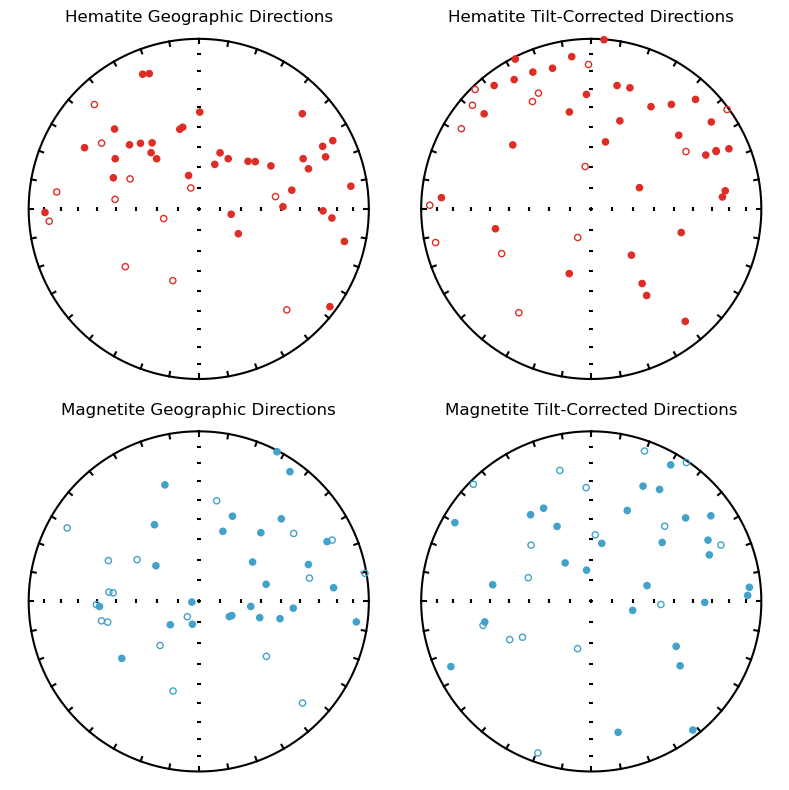

In [40]:
plt.figure(figsize=(8,8))

plt.subplot(2,2,1)
ipmag.plot_net()
plt.title('Hematite Geographic Directions')
ipmag.plot_di(dec=IF_hmt_geo['dir_dec'].tolist(), inc=IF_hmt_geo['dir_inc'].tolist(),color=hmt_color)

plt.subplot(2,2,2)
ipmag.plot_net()
plt.title('Hematite Tilt-Corrected Directions')
ipmag.plot_di(dec=IF_hmt_tilt['dir_dec'].tolist(), inc=IF_hmt_tilt['dir_inc'].tolist(),color=hmt_color)


plt.subplot(2,2,3)
ipmag.plot_net()
plt.title('Magnetite Geographic Directions')
ipmag.plot_di(dec=IF_mgt_geo['dir_dec'].tolist(), inc=IF_mgt_geo['dir_inc'].tolist(),color=mgt_color)

plt.subplot(2,2,4)
ipmag.plot_net()
plt.title('Magnetite Tilt-Corrected Directions')
ipmag.plot_di(dec=IF_mgt_tilt['dir_dec'].tolist(), inc=IF_mgt_tilt['dir_inc'].tolist(),color=mgt_color)



plt.show()

## Grab and split up Jasper Knob specimens 

Now that we have split the specimens into their respective formation affiliations we can further split the Negaunee into the Jasper Knob (jk) and New Richmond data (nf)

In [91]:
jk_hmt_geo=IF_hmt_geo[IF_hmt_geo['sample'].str.match('jk.')]
jk_hmt_tilt=IF_hmt_tilt[IF_hmt_tilt['sample'].str.match('jk.')]
jk_mgt_geo=IF_mgt_geo[IF_mgt_geo['sample'].str.match('jk.')]
jk_mgt_tilt=IF_mgt_tilt[IF_mgt_tilt['sample'].str.match('jk.')]


nf_hmt_geo=IF_hmt_geo[IF_hmt_geo['sample'].str.match('NF.9|NF.10')]
nf_hmt_tilt=IF_hmt_tilt[IF_hmt_tilt['sample'].str.match('NF.9|NF.10')]
nf_mgt_geo=IF_mgt_geo[IF_mgt_geo['sample'].str.match('NF.9|NF.10')]
nf_mgt_tilt=IF_mgt_tilt[IF_mgt_tilt['sample'].str.match('NF.9|NF.10')]


Let's further subdivide the Jasper Knob samples into the jaspillite samples (jk.3 through jk.21) and the south and west pit samples. 
The samples on the south and west sides of Jasper Knob correspond to a oriented blocks taken from relict mine pits ( Fig 1C. in manuscript)

In [53]:
young_specimens=['jk.22a','jk.23a','jk.24a','jk.25a','jk.26a','jk.27a','jk.28a','jk.29a','jk.31a','jk.35a','jk.36a',
                 'jk.37a']

jk_top=jk_hmt_geo[~jk_hmt_geo['sample'].isin(young_specimens)]
jk_top_tilt=jk_hmt_tilt[~jk_hmt_tilt['sample'].isin(young_specimens)]
jk_top_mgt=jk_mgt_geo[~jk_mgt_geo['sample'].isin(young_specimens)]
jk_top_mgt_tilt=jk_mgt_tilt[~jk_mgt_tilt['sample'].isin(young_specimens)]

jk_side_specimens=['jk.22a','jk.23a','jk.24a','jk.25a']
jk_side_geo=jk_hmt_geo[jk_hmt_geo['specimen'].isin(jk_side_specimens)]
jk_side_tilt=jk_hmt_tilt[jk_hmt_tilt['specimen'].isin(jk_side_specimens)]

jk_west_specimens=['jk.26a','jk.27a','jk.28a','jk.29a','jk.30a','jk.31a','jk.35a']
jk_west_geo=jk_hmt_geo[jk_hmt_geo['specimen'].isin(jk_west_specimens)]
jk_west_tilt=jk_hmt_tilt[jk_hmt_tilt['specimen'].isin(jk_west_specimens)]


Let's compare the geographic and tilt corrected hematite directions for the jaspillite-facies data visually. It is clear that the data are far more dispersed once a tilt correction for the laminae are applied. 

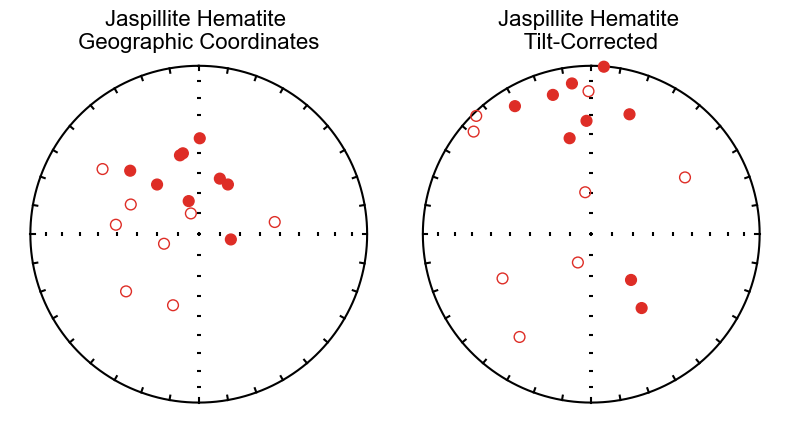

In [70]:
plt.figure(figsize=(8,8))

plt.subplot(2,2,1)
ipmag.plot_net()
plt.title('Jaspillite Hematite \n Geographic Coordinates ',font='arial',fontsize=16)
ipmag.plot_di(dec=jk_top['dir_dec'].tolist(), inc=jk_top['dir_inc'].tolist(),color=hmt_color,markersize=60)

plt.subplot(2,2,2)
ipmag.plot_net()
plt.title('Jaspillite Hematite \n Tilt-Corrected ', font='arial',fontsize=16)
ipmag.plot_di(dec=jk_top_tilt['dir_dec'].tolist(), inc=jk_top_tilt['dir_inc'].tolist(),color=hmt_color,markersize=60)


plt.savefig('../figures/eq_area/jasp_hematite.pdf',bbox_inches='tight')

Now the magnetite directions 

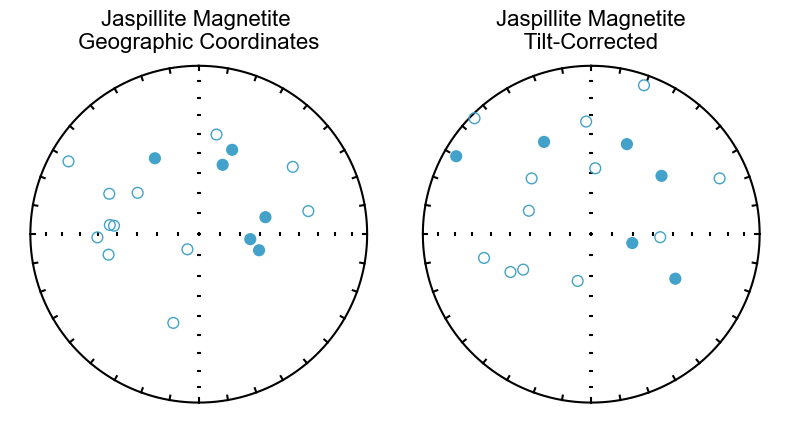

In [71]:
plt.figure(figsize=(8,8))

plt.subplot(2,2,1)
ipmag.plot_net()
plt.title('Jaspillite Magnetite \n Geographic Coordinates ',font='arial',fontsize=16)
ipmag.plot_di(dec=jk_top_mgt['dir_dec'].tolist(), inc=jk_top_mgt['dir_inc'].tolist(),color=mgt_color,markersize=60)

plt.subplot(2,2,2)
ipmag.plot_net()
plt.title('Jaspillite Magnetite\n Tilt-Corrected ', font='arial',fontsize=16)
ipmag.plot_di(dec=jk_top_mgt_tilt['dir_dec'].tolist(), inc=jk_top_mgt_tilt['dir_inc'].tolist(),color=mgt_color,markersize=60)


## Fold Test 

Now we will conduct a bootstrap fold test that accounts for a range of dip corrections from -10 to 0 percent folding and determines the best fit confidence interval for the correction. The results clearly support remanence acquire following folding which is consistent with hematite remanence acquire during growth following folding. 

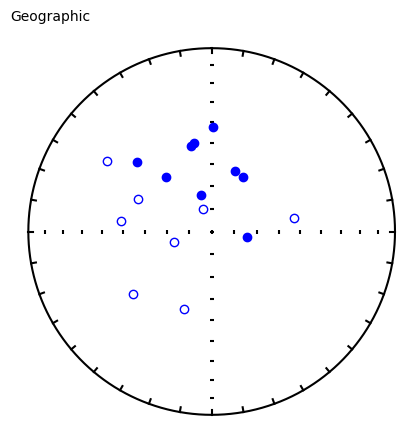

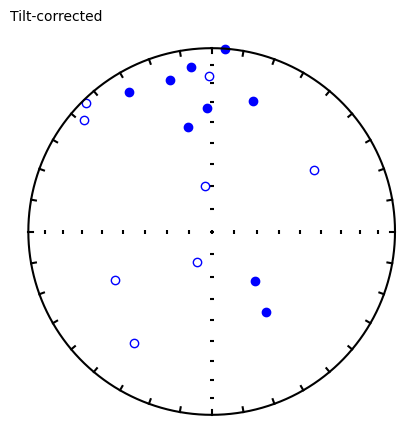

doing  2000  iterations...please be patient.....

tightest grouping of vectors obtained at (95% confidence bounds):
-10 - -2 percent unfolding
range of all bootstrap samples: 
-10  -  99 percent unfolding


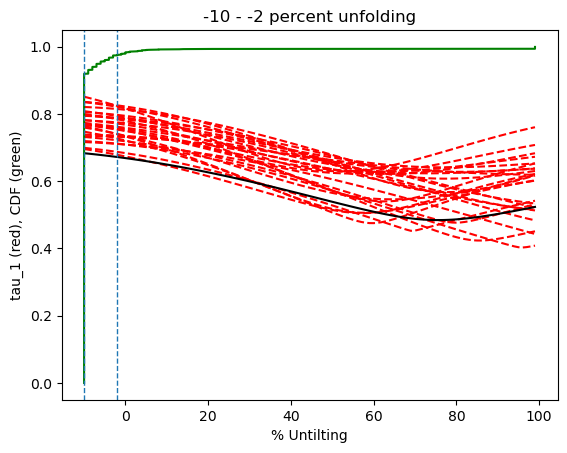

In [10]:
jk_hmt_top_dir=ipmag.make_diddd_array(jk_top['dir_dec'].tolist(),jk_top['dir_inc'].tolist(),jk_top['bed_dip_direction'].tolist(),jk_top['bed_dip'].tolist())

ipmag.bootstrap_fold_test(jk_hmt_top_dir,num_sims=2000,min_untilt=-10, max_untilt=100,save=False)


The cell below runs the fold test on the same specimens but on the isolated magnetite component 

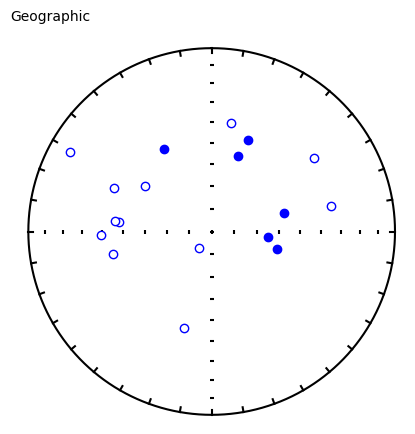

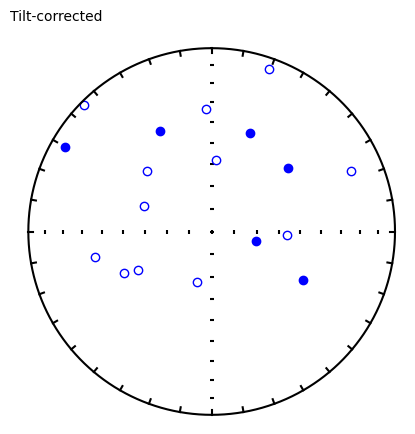

doing  2000  iterations...please be patient.....

tightest grouping of vectors obtained at (95% confidence bounds):
-10 - 57 percent unfolding
range of all bootstrap samples: 
-10  -  99 percent unfolding


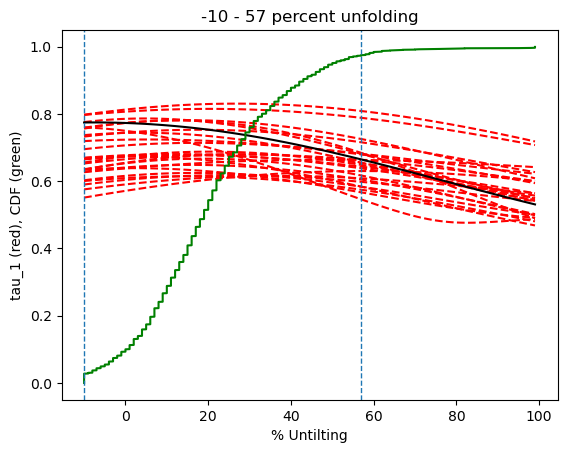

In [73]:
jk_mgt_top_dir=ipmag.make_diddd_array(jk_top_mgt['dir_dec'].tolist(),jk_top_mgt['dir_inc'].tolist(),jk_top_mgt['bed_dip_direction'].tolist(),jk_top_mgt['bed_dip'].tolist())

ipmag.bootstrap_fold_test(jk_mgt_top_dir,num_sims=2000,min_untilt=-10, max_untilt=100,save=True,save_folder='../figures/', fmt='pdf')


## Directional comparisons for Negaunee Sites 

This section plots up the New Richmond sites (NF9 and NF10) that exhibited similar directions to the ca. 990 Ma Jacobsville Formation from Zhang et al., (2024) first. 
We then compare the mine pit directions to the top of Jasper knob jaspillite facies hematite components. 

In [42]:
nf9_hmt_geo=IF_hmt_geo[IF_hmt_geo['sample'].str.match('NF.9')]
nf9_hmt_tilt=IF_hmt_tilt[IF_hmt_tilt['sample'].str.match('NF.9')]
nf9_mgt_geo=IF_mgt_geo[IF_mgt_geo['sample'].str.match('NF.9')]
nf9_mgt_tilt=IF_mgt_tilt[IF_mgt_tilt['sample'].str.match('NF.9')]



nf10_hmt_geo=IF_hmt_geo[IF_hmt_geo['sample'].str.match('NF.10')]
nf10_hmt_tilt=IF_hmt_tilt[IF_hmt_tilt['sample'].str.match('NF.10')]
nf10_mgt_geo=IF_mgt_geo[IF_mgt_geo['sample'].str.match('NF.10')]
nf10_mgt_tilt=IF_mgt_tilt[IF_mgt_tilt['sample'].str.match('NF.10')]



### Plot of New Richmond hematite and magnetite directions in geographic coordinates 

These are the equal area plots showing the directions from specimens from the NF9 and NF10 sites from the New Richmond mine jaspillite facies that we plot in geographic coordinates. Both the magnetite and hematite components are plotted on equal area plots below 

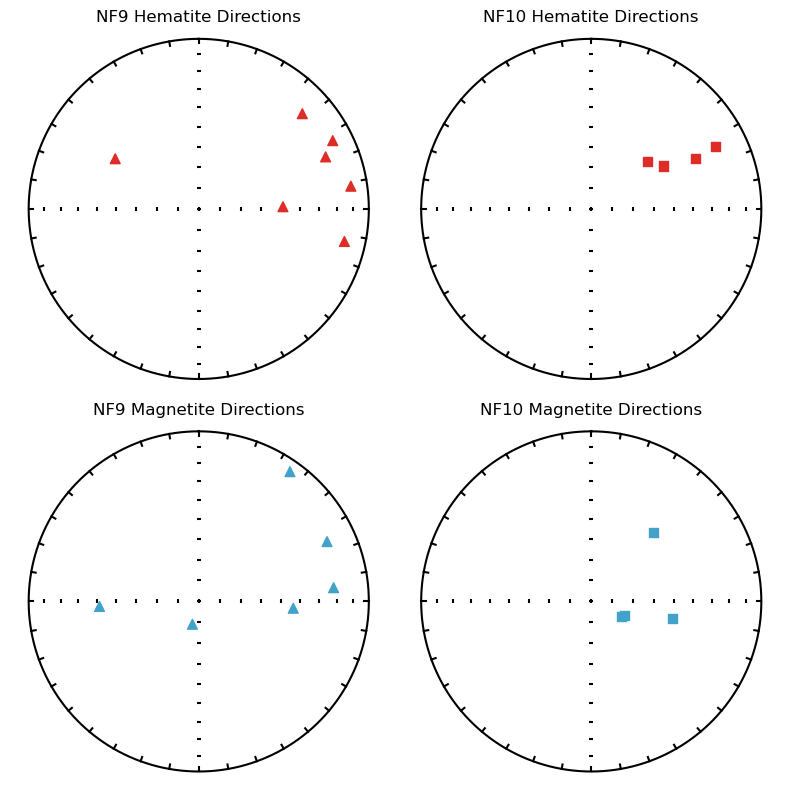

In [46]:
plt.figure(figsize=(8,8))
plt.subplot(2,2,1)
ipmag.plot_net()
plt.title('NF9 Hematite Directions')
ipmag.plot_di(dec=nf9_hmt_geo['dir_dec'].tolist(), inc=nf9_hmt_geo['dir_inc'].tolist(),marker='^',markersize=50,color=hmt_color)


plt.subplot(2,2,2)
ipmag.plot_net()
plt.title('NF10 Hematite Directions')
ipmag.plot_di(dec=nf10_hmt_geo['dir_dec'].tolist(), inc=nf10_hmt_geo['dir_inc'].tolist(),marker='s',markersize=45,color=hmt_color)

plt.subplot(2,2,3)
ipmag.plot_net()
plt.title('NF9 Magnetite Directions')
ipmag.plot_di(dec=nf9_mgt_geo['dir_dec'].tolist(), inc=nf9_mgt_geo['dir_inc'].tolist(),marker='^',markersize=50,color=mgt_color)


plt.subplot(2,2,4)
ipmag.plot_net()
plt.title('NF10 Magnetite Directions')
ipmag.plot_di(dec=nf10_mgt_geo['dir_dec'].tolist(), inc=nf10_mgt_geo['dir_inc'].tolist(),marker='s',markersize=45,color=mgt_color)




## Plot of Ore vs other localities 

Here we compare the ore pits on the west and southern side of Jasper Knob to the Jaspillite facies specimens from the top of Jasper Knob and New Richmond

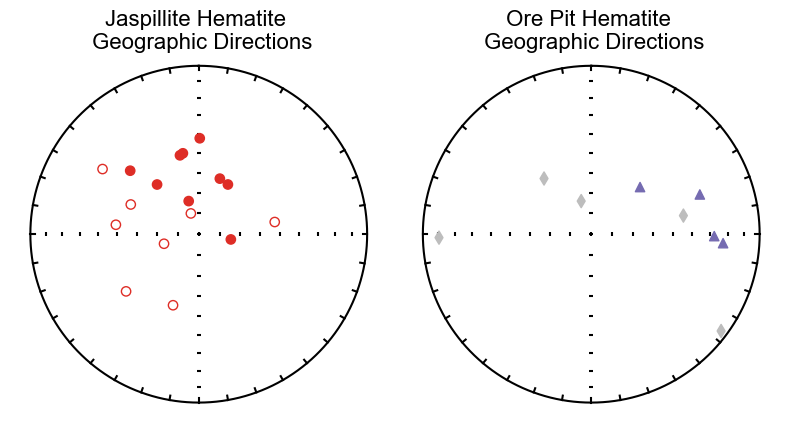

In [86]:
plt.figure(figsize=(8,8))

plt.subplot(2,2,1)
ipmag.plot_net()
plt.title('Jaspillite Hematite \n Geographic Directions',font='arial',fontsize=16)
ipmag.plot_di(dec=jk_top['dir_dec'].tolist(), inc=jk_top['dir_inc'].tolist(),color=hmt_color,marker='o',markersize=45,label='JK summit')


plt.subplot(2,2,2)
ipmag.plot_net()
plt.title('Ore Pit Hematite \n Geographic Directions', font='arial',fontsize=16)
ipmag.plot_di(dec=jk_side_geo['dir_dec'].tolist(), inc=jk_side_geo['dir_inc'].tolist(),color=jk_side_clr,marker='^',markersize=45,label='JK side')
ipmag.plot_di(dec=jk_west_geo['dir_dec'].tolist(), inc=jk_west_geo['dir_inc'].tolist(),color=jk_west_clr,marker='d',markersize=45,label='JK west')

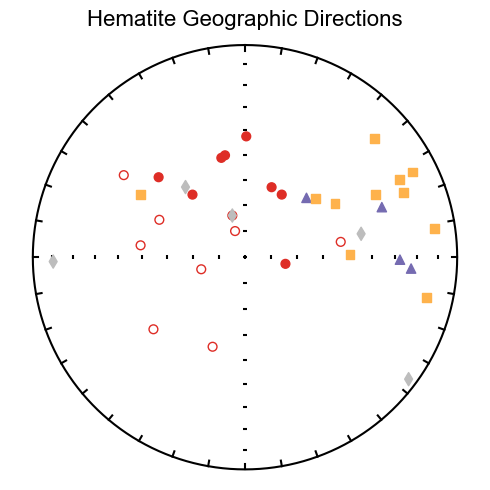

In [92]:
plt.figure(figsize=(5,5))

plt.subplot(1,1,1)
ipmag.plot_net()
plt.title('Hematite Geographic Directions',font='arial',fontsize=16)
ipmag.plot_di(dec=jk_top['dir_dec'].tolist(), inc=jk_top['dir_inc'].tolist(),color=jk_top_clr,marker='o',markersize=40,label='JK summit')
ipmag.plot_di(dec=jk_side_geo['dir_dec'].tolist(), inc=jk_side_geo['dir_inc'].tolist(),color=jk_side_clr,marker='^',markersize=45,label='JK side')
ipmag.plot_di(dec=jk_west_geo['dir_dec'].tolist(), inc=jk_west_geo['dir_inc'].tolist(),color=jk_west_clr,marker='d',markersize=45,label='JK west')
ipmag.plot_di(dec=nf_hmt_geo['dir_dec'].tolist(), inc=nf_hmt_geo['dir_inc'].tolist(),color=nf_color,marker='s',markersize=40,label='New Richmond')

## Goodrich Conglomerate 

#### This section is to run the conglemerate test on the GQ5 locality that we collected oriented IF clasts within the basal Goodrich Quartzite

In [75]:
gq_mgt_tilt=gq_specimens[(gq_specimens['dir_comp']=='Mgt')&(gq_specimens['dir_tilt_correction']==100)]
gq_mgt_geo=gq_specimens[(gq_specimens['dir_comp']=='Mgt')&(gq_specimens['dir_tilt_correction']==0)]
gq_hmt_tilt=gq_specimens[(gq_specimens['dir_comp']=='Hmt')&(gq_specimens['dir_tilt_correction']==100)]
gq_hmt_geo=gq_specimens[(gq_specimens['dir_comp']=='Hmt')&(gq_specimens['dir_tilt_correction']==0)]

In [76]:
gq_hmt_geo_mean=ipmag.fisher_mean(gq_hmt_geo['dir_dec'].tolist(),gq_hmt_geo['dir_inc'].tolist())
ipmag.conglomerate_test_Watson(gq_hmt_geo_mean['r'],gq_hmt_geo_mean['n'])

R = 11.250811181210105
Ro_95 = 7.396282850189006
Ro_99 = 8.911509411990766
The null hypothesis of randomness can be rejected at the 95% confidence level
The null hypothesis of randomness can be rejected at the 99% confidence level


{'n': 21,
 'R': 11.250811181210105,
 'Ro_95': 7.396282850189006,
 'Ro_99': 8.911509411990766}

In [77]:
gq_mgt_mean=ipmag.fisher_mean(gq_mgt_geo['dir_dec'].tolist(),(gq_mgt_geo['dir_inc'].tolist()))
ipmag.conglomerate_test_Watson(gq_mgt_mean['r'],gq_mgt_mean['n'])


R = 4.182964094441498
Ro_95 = 8.229823813423955
Ro_99 = 9.91581228812513
This population "passes" a conglomerate test as the null hypothesis of randomness cannot be rejected at the 95% confidence level


{'n': 26,
 'R': 4.182964094441498,
 'Ro_95': 8.229823813423955,
 'Ro_99': 9.91581228812513}

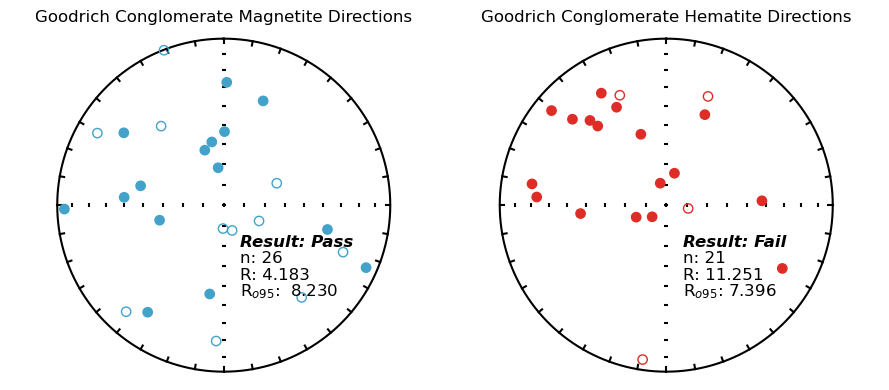

In [82]:
plt.figure(figsize=(9,4))
plt.subplot(1,2,1)
ipmag.plot_net()
plt.title('Goodrich Conglomerate Magnetite Directions')
ipmag.plot_di(dec=gq_mgt_geo['dir_dec'].tolist(), inc=gq_mgt_geo['dir_inc'].tolist(),color=mgt_color,markersize=45)

plt.annotate('Result: Pass ',(0.1,-0.25),fontsize=12,style='italic',fontweight='semibold')
plt.annotate('n: 26',(0.1,-0.35),fontsize=12)
plt.annotate('R: 4.183',(0.1,-0.45),fontsize=12)
plt.annotate('R$_{o95}$:  8.230',(0.1,-0.55),fontsize=12)

plt.subplot(1,2,2)
ipmag.plot_net()
plt.title('Goodrich Conglomerate Hematite Directions')
ipmag.plot_di(dec=gq_hmt_geo['dir_dec'].tolist(), inc=gq_hmt_geo['dir_inc'].tolist(),color=hmt_color,markersize=45)


plt.annotate('Result: Fail ',(0.1,-0.25),fontsize=12,style='italic',fontweight='semibold')
plt.annotate('n: 21',(0.1,-0.35),fontsize=12)
plt.annotate('R: 11.251',(0.1,-0.45),fontsize=12)
plt.annotate('R$_{o95}$: 7.396',(0.1,-0.55),fontsize=12)


